In [1]:
import pandas as pd
import json
from collections import Counter

In [2]:
# Load the JSON files
file_path_cut = 'train.json'

In [3]:
df_cut_1 = pd.read_json(file_path_cut)

In [4]:
df_cut_1.head()

,user_1,user_2,user_3,user_4,user_5,user_6,user_7,user_8,user_9,user_10,...,user_127746,user_127747,user_127748,user_127749,user_127750,user_127751,user_127752,user_127753,user_127754,user_127755
target,female,female,male,male,female,female,female,female,female,male,...,male,female,male,female,male,male,male,female,female,female
features,"{'orders': [{'site-id': 1, 'orders': [{'create...","{'visits': [{'site-id': 3, 'first-seen': 16962...","{'orders': [{'site-id': 21, 'orders': [{'creat...","{'orders': [{'site-id': 2, 'orders': [{'create...","{'orders': [{'site-id': 39, 'orders': [{'creat...","{'orders': [{'site-id': 123, 'orders': [{'crea...","{'visits': [{'site-id': 225, 'first-seen': 169...","{'orders': [{'site-id': 196, 'orders': [{'crea...","{'orders': [{'site-id': 307, 'orders': [{'crea...","{'orders': [{'site-id': 49, 'orders': [{'creat...",...,"{'orders': [{'site-id': 173, 'orders': [{'crea...","{'visits': [{'site-id': 3, 'first-seen': 16897...","{'orders': [{'site-id': 348, 'orders': [{'crea...","{'orders': [{'site-id': 39, 'orders': [{'creat...","{'orders': [{'site-id': 41, 'orders': [{'creat...","{'orders': [{'site-id': 307, 'orders': [{'crea...","{'orders': [{'site-id': 147, 'orders': [{'crea...","{'orders': [{'site-id': 20, 'orders': [{'creat...","{'orders': [{'site-id': 407, 'orders': [{'crea...","{'orders': [{'site-id': 726, 'orders': [{'crea..."


In [5]:
# Transposing the DataFrame
df_transposed_1 = df_cut_1.T

# Resetting the index to create a 'user_id' column
df_transposed_1.reset_index(inplace=True)
df_transposed_1.rename(columns={'index': 'user_id', 0: 'target', 1: 'features'}, inplace=True)

# Displaying the first few rows of the transposed DataFrame
df_transposed_1.head()


,user_id,target,features
0,user_1,female,"{'orders': [{'site-id': 1, 'orders': [{'create..."
1,user_2,female,"{'visits': [{'site-id': 3, 'first-seen': 16962..."
2,user_3,male,"{'orders': [{'site-id': 21, 'orders': [{'creat..."
3,user_4,male,"{'orders': [{'site-id': 2, 'orders': [{'create..."
4,user_5,female,"{'orders': [{'site-id': 39, 'orders': [{'creat..."


In [6]:
# Finding all unique keys in the 'features' column
unique_keys = set()
for features in df_transposed_1['features']:
    unique_keys.update(features.keys())

# Creating columns for each unique key in 'features'
for key in unique_keys:
    df_transposed_1[key] = df_transposed_1['features'].apply(lambda x: x.get(key))

# Dropping the original 'features' column
df_transposed_1.drop('features', axis=1, inplace=True)

df_transposed_1.head()


,user_id,target,last-visits-in-categories,visits,site-meta,orders,exchange-sessions
0,user_1,female,None,None,[{'site-id': 2}],"[{'site-id': 1, 'orders': [{'created-at': 1634...",None
1,user_2,female,"[{'category': 'other', 'last-visit-at': 169627...","[{'site-id': 3, 'first-seen': 1696277805, 'las...","[{'site-id': 4}, {'site-id': 5}, {'site-id': 6...",None,None
2,user_3,male,"[{'category': 'electronics', 'last-visit-at': ...","[{'site-id': 3, 'first-seen': 1696320204, 'las...","[{'site-id': 24}, {'site-id': 25}, {'site-id':...","[{'site-id': 21, 'orders': [{'created-at': 168...",None
3,user_4,male,"[{'category': 'hypermarket', 'last-visit-at': ...","[{'site-id': 3, 'first-seen': 1693468067, 'las...","[{'site-id': 33}, {'site-id': 2}, {'site-id': ...","[{'site-id': 2, 'orders': [{'created-at': 1600...",None
4,user_5,female,"[{'category': 'insurance', 'last-visit-at': 16...","[{'site-id': 3, 'first-seen': 1693796766, 'las...","[{'site-id': 42}, {'site-id': 43}, {'site-id':...","[{'site-id': 39, 'orders': [{'created-at': 164...",None


In [7]:
# Modified function to count occurrences of site-id in orders with additional checks
def count_site_ids_in_orders_modified(orders):
    site_id_counter = Counter()
    if orders is not None:
        for order_dict in orders:
            if 'orders' in order_dict and 'site-id' in order_dict:
                site_id = order_dict['site-id']
                for order in order_dict['orders']:
                    site_id_counter[site_id] += 1
    return site_id_counter

In [8]:

# Re-applying the modified function to the 'orders' column
df_transposed_1['orders_count'] = df_transposed_1['orders'].apply(count_site_ids_in_orders_modified)

# Checking the result for the first few users
df_transposed_1[['user_id', 'orders_count']].head()


,user_id,orders_count
0,user_1,"{1: 1, 2: 2}"
1,user_2,{}
2,user_3,"{21: 1, 22: 1}"
3,user_4,"{2: 1, 29: 2, 30: 4, 21: 1}"
4,user_5,"{39: 1, 40: 1, 20: 1}"


In [9]:
# Modified function to count occurrences of site-id in visits with additional checks
def count_site_ids_in_visits_modified(visits):
    site_id_counter = Counter()
    if visits is not None:
        for visit_group in visits:
            if 'visits' in visit_group and 'site-id' in visit_group:
                site_id = visit_group['site-id']
                for visit in visit_group['visits']:
                    site_id_counter[site_id] += 1
    return site_id_counter

In [10]:

# Re-applying the modified function to the 'visits' column
df_transposed_1['visits_count'] = df_transposed_1['visits'].apply(count_site_ids_in_visits_modified)

# Checking the result for the first few users
df_transposed_1[['user_id', 'visits_count']].head()


,user_id,visits_count
0,user_1,{}
1,user_2,{3: 2}
2,user_3,"{3: 1, 23: 3, 16: 10}"
3,user_4,"{3: 2, 21: 1, 20: 4, 31: 1, 30: 6, 32: 3}"
4,user_5,"{3: 3, 23: 1, 13: 7, 41: 2, 20: 10}"


In [11]:
# Function to extract categories from last-visits-in-categories
def extract_categories(last_visits):
    if last_visits is not None:
        return [visit['category'] for visit in last_visits]
    return []

In [12]:

df_transposed_1['last_visited_categories'] = df_transposed_1['last-visits-in-categories'].apply(extract_categories)

In [13]:
# Checking the result for the first few users
df_transposed_1[['user_id', 'last_visited_categories']].head()

,user_id,last_visited_categories
0,user_1,[]
1,user_2,[other]
2,user_3,"[electronics, other]"
3,user_4,"[hypermarket, other, education]"
4,user_5,"[insurance, fashion, other, bank, pets, electr..."


In [14]:

# Displaying the results for the first few users
df_transposed_1[['user_id', 'orders_count', 'visits_count', 'last_visited_categories']].head()


,user_id,orders_count,visits_count,last_visited_categories
0,user_1,"{1: 1, 2: 2}",{},[]
1,user_2,{},{3: 2},[other]
2,user_3,"{21: 1, 22: 1}","{3: 1, 23: 3, 16: 10}","[electronics, other]"
3,user_4,"{2: 1, 29: 2, 30: 4, 21: 1}","{3: 2, 21: 1, 20: 4, 31: 1, 30: 6, 32: 3}","[hypermarket, other, education]"
4,user_5,"{39: 1, 40: 1, 20: 1}","{3: 3, 23: 1, 13: 7, 41: 2, 20: 10}","[insurance, fashion, other, bank, pets, electr..."


In [15]:
all_sites = set()
all_categories = set()

In [16]:
for _, row in df_transposed_1.iterrows():
    all_sites.update(row['orders_count'].keys())
    all_sites.update(row['visits_count'].keys())
    all_categories.update(row['last_visited_categories'])

In [17]:
all_sites

{1,
 2,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 37,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 68,
 69,
 71,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 127,
 128,
 129,
 130,
 132,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 

In [18]:
all_categories


{'"0" => "f", "1" => "a", "2" => "s", "3" => "h", "4" => "i", "5" => "o", "6" => "n"',
 'bank',
 'cosmetics',
 'dealoftheday',
 'education',
 'electronics',
 'entertainment_services',
 'fashion',
 'food',
 'furniture',
 'gifts',
 'health',
 'household_appliances',
 'hypermarket',
 'insurance',
 'kids',
 'luxury',
 'media',
 'other',
 'pets',
 'shoes',
 'software',
 'sport',
 'travel'}

In [19]:
# Создание столбцов для каждого site-id и категории
for site in all_sites:
    df_transposed_1['orders_' + str(site)] = df_transposed_1['orders_count'].apply(lambda x: x.get(site, 0))
    df_transposed_1['visits_' + str(site)] = df_transposed_1['visits_count'].apply(lambda x: x.get(site, 0))

C:\Users\ivans\AppData\Local\Temp\ipykernel_7376\3922217919.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_transposed_1['orders_' + str(site)] = df_transposed_1['orders_count'].apply(lambda x: x.get(site, 0))
C:\Users\ivans\AppData\Local\Temp\ipykernel_7376\3922217919.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_transposed_1['visits_' + str(site)] = df_transposed_1['visits_count'].apply(lambda x: x.get(site, 0))
C:\Users\ivans\AppData\Local\Temp\ipykernel_7376\3922217919.py:3: PerformanceWarning: DataFrame is h

In [20]:
for category in all_categories:
    df_transposed_1['category_' + category] = df_transposed_1['last_visited_categories'].apply(lambda x: 1 if category in x else 0)

C:\Users\ivans\AppData\Local\Temp\ipykernel_7376\575087609.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_transposed_1['category_' + category] = df_transposed_1['last_visited_categories'].apply(lambda x: 1 if category in x else 0)
C:\Users\ivans\AppData\Local\Temp\ipykernel_7376\575087609.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_transposed_1['category_' + category] = df_transposed_1['last_visited_categories'].apply(lambda x: 1 if category in x else 0)
C:\Users\ivans\AppData\Local\Temp\ipykernel_7376\5750876

In [21]:
# Удаление исходных столбцов со словарями и списками
df_transposed_1.drop(['orders_count', 'visits_count', 'last_visited_categories'], axis=1, inplace=True)

In [22]:
df_transposed_1.drop(['user_id', 'orders', 'site-meta', 'exchange-sessions',
       'visits', 'last-visits-in-categories'], axis=1, inplace=True)

In [23]:
df_transposed_1.columns

Index(['target', 'orders_1', 'visits_1', 'orders_2', 'visits_2', 'orders_3',
       'visits_3', 'orders_5', 'visits_5', 'orders_6',
       ...
       'category_cosmetics',
       'category_"0" => "f", "1" => "a", "2" => "s", "3" => "h", "4" => "i", "5" => "o", "6" => "n"',
       'category_pets', 'category_luxury', 'category_education',
       'category_health', 'category_fashion', 'category_sport',
       'category_household_appliances', 'category_entertainment_services'],
      dtype='object', length=2035)

In [24]:
df_transposed_1.head(10)

,target,orders_1,visits_1,orders_2,visits_2,orders_3,visits_3,orders_5,visits_5,orders_6,...,category_cosmetics,"category_""0"" => ""f"", ""1"" => ""a"", ""2"" => ""s"", ""3"" => ""h"", ""4"" => ""i"", ""5"" => ""o"", ""6"" => ""n""",category_pets,category_luxury,category_education,category_health,category_fashion,category_sport,category_household_appliances,category_entertainment_services
0,female,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,female,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,male,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,male,0,0,1,0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,female,0,0,0,0,0,3,0,0,0,...,1,0,1,0,1,1,1,0,0,1
5,female,0,0,0,0,0,5,0,0,0,...,1,0,0,0,0,1,1,0,1,1
6,female,0,0,0,0,0,3,0,0,0,...,0,0,0,1,1,0,0,0,0,0
7,female,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,female,0,0,0,0,0,3,0,0,0,...,1,0,0,0,1,1,1,0,0,1
9,male,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [68]:
from sklearn.model_selection import train_test_split

In [25]:
# Замена 'мужчина' на 1 и 'женщина' на 0 в целевой переменной
df_transposed_1['target'] = df_transposed_1['target'].replace({'male': 1, 'female': 0})

# Проверка результатов замены
print(df_transposed_1['target'].head())


0    0
1    0
2    1
3    1
4    0
Name: target, dtype: int64


In [26]:
# Определение целевой переменной (y) и признаков (X)
y = df_transposed_1['target']
X = df_transposed_1.drop('target', axis=1)

# Грузим валидационный набор данных

In [27]:
df_val = pd.read_json('val.json')

In [28]:
# транспонируем датасет что бы он принял человеческий вид
df_transposed_val = df_val.T

# зададим имена колонок (важно когда будем работать с тестовым набором то колонки таргет у нас не будет)
df_transposed_val.reset_index(inplace=True)
df_transposed_val.rename(columns={'index': 'user_id', 0: 'target', 1: 'features'}, inplace=True)

# Посмотрим что получилось
df_transposed_val.head()

,user_id,target,features
0,user_127756,female,"{'orders': [{'site-id': 407, 'orders': [{'crea..."
1,user_127757,male,"{'orders': [{'site-id': 16, 'orders': [{'creat..."
2,user_127758,female,"{'orders': [{'site-id': 149, 'orders': [{'crea..."
3,user_127759,female,"{'orders': [{'site-id': 93, 'orders': [{'creat..."
4,user_127760,female,"{'visits': [{'site-id': 3, 'first-seen': 16836..."


In [29]:
# найдем все унникальные ключи внути ключа features
unique_keys = set()
for features in df_transposed_val['features']:
    unique_keys.update(features.keys())

# создадим из них новые колонки извлекая данные из 'features'
for key in unique_keys:
    df_transposed_val[key] = df_transposed_val['features'].apply(lambda x: x.get(key))

# колонку 'features' удалим за дальнейшей ненадобностью
df_transposed_val.drop('features', axis=1, inplace=True)

# посмотрим что получилось
df_transposed_val.head()

,user_id,target,last-visits-in-categories,visits,site-meta,orders,exchange-sessions
0,user_127756,female,"[{'category': 'other', 'last-visit-at': 169713...","[{'site-id': 3, 'first-seen': 1697125590, 'las...",[{'site-id': 407}],"[{'site-id': 407, 'orders': [{'created-at': 16...","[{'landed-at': 1697132982, 'sites': [169, 214,..."
1,user_127757,male,"[{'category': 'electronics', 'last-visit-at': ...","[{'site-id': 3, 'first-seen': 1698423484, 'las...","[{'site-id': 16, 'recency': 1, 'frequency': 5,...","[{'site-id': 16, 'orders': [{'created-at': 163...","[{'landed-at': 1693508972, 'sites': [2, 169, 7..."
2,user_127758,female,"[{'category': 'sport', 'last-visit-at': 165060...","[{'site-id': 391, 'first-seen': 1685615371, 'l...","[{'site-id': 391}, {'site-id': 42}, {'site-id'...","[{'site-id': 149, 'orders': [{'created-at': 16...",None
3,user_127759,female,"[{'category': 'furniture', 'last-visit-at': 16...","[{'site-id': 495, 'first-seen': 1687325784, 'l...","[{'site-id': 93, 'recency': 5, 'frequency': 2,...","[{'site-id': 93, 'orders': [{'created-at': 162...","[{'landed-at': 1697791749, 'sites': [373, 169,..."
4,user_127760,female,"[{'category': 'other', 'last-visit-at': 169765...","[{'site-id': 3, 'first-seen': 1683626530, 'las...","[{'site-id': 46}, {'site-id': 29}, {'site-id':...",None,None


In [30]:
# Создадим новую колонку в которой будет количество заказов на каждом сайте для каждого пользователя
df_transposed_val['orders_count'] = df_transposed_val['orders'].apply(count_site_ids_in_orders_modified)

# посмотрим что получилось
df_transposed_val[['user_id', 'orders_count']].head()

,user_id,orders_count
0,user_127756,{407: 1}
1,user_127757,"{16: 10, 40: 1, 288: 1, 21: 2}"
2,user_127758,"{149: 2, 25: 1, 21: 2, 100: 1, 474: 1}"
3,user_127759,"{93: 8, 134: 1, 103: 1}"
4,user_127760,{}


In [31]:
# Применим функцию и создадим новый столбец
df_transposed_val['visits_count'] = df_transposed_val['visits'].apply(count_site_ids_in_visits_modified)

# посмотрим что получилось
df_transposed_val[['user_id', 'visits_count']].head()

,user_id,visits_count
0,user_127756,"{3: 2, 407: 10}"
1,user_127757,"{3: 1, 308: 1, 16: 1}"
2,user_127758,"{391: 1, 42: 7, 485: 1, 820: 1, 97: 5, 39: 1, ..."
3,user_127759,"{495: 1, 34: 9, 484: 1, 334: 1, 205: 1, 31: 1,..."
4,user_127760,"{3: 2, 34: 1}"


In [32]:
# применим функцию и создадим новый столбец с требуемым списком
df_transposed_val['last_visited_categories'] = df_transposed_val['last-visits-in-categories'].apply(extract_categories)
# Checking the result for the first few users
df_transposed_val[['user_id', 'last_visited_categories']].head()

,user_id,last_visited_categories
0,user_127756,"[other, education]"
1,user_127757,"[electronics, other, shoes]"
2,user_127758,"[sport, furniture, fashion, other, bank, house..."
3,user_127759,"[furniture, fashion, other, food, electronics,..."
4,user_127760,"[other, cosmetics]"


In [33]:
# посмотрим на на результат нашего features engeneering
df_transposed_val[['user_id', 'orders_count', 'visits_count', 'last_visited_categories']].head()

,user_id,orders_count,visits_count,last_visited_categories
0,user_127756,{407: 1},"{3: 2, 407: 10}","[other, education]"
1,user_127757,"{16: 10, 40: 1, 288: 1, 21: 2}","{3: 1, 308: 1, 16: 1}","[electronics, other, shoes]"
2,user_127758,"{149: 2, 25: 1, 21: 2, 100: 1, 474: 1}","{391: 1, 42: 7, 485: 1, 820: 1, 97: 5, 39: 1, ...","[sport, furniture, fashion, other, bank, house..."
3,user_127759,"{93: 8, 134: 1, 103: 1}","{495: 1, 34: 9, 484: 1, 334: 1, 205: 1, 31: 1,...","[furniture, fashion, other, food, electronics,..."
4,user_127760,{},"{3: 2, 34: 1}","[other, cosmetics]"


In [34]:
all_sites = set()
all_categories = set()

In [36]:
for _, row in df_transposed_val.iterrows():
    all_sites.update(row['orders_count'].keys())
    all_sites.update(row['visits_count'].keys())
    all_categories.update(row['last_visited_categories'])

In [37]:
# Создание столбцов для каждого site-id и категории
for site in all_sites:
    df_transposed_val['orders_' + str(site)] = df_transposed_val['orders_count'].apply(lambda x: x.get(site, 0))
    df_transposed_val['visits_' + str(site)] = df_transposed_val['visits_count'].apply(lambda x: x.get(site, 0))

C:\Users\ivans\AppData\Local\Temp\ipykernel_7376\4291846130.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_transposed_val['orders_' + str(site)] = df_transposed_val['orders_count'].apply(lambda x: x.get(site, 0))
C:\Users\ivans\AppData\Local\Temp\ipykernel_7376\4291846130.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_transposed_val['visits_' + str(site)] = df_transposed_val['visits_count'].apply(lambda x: x.get(site, 0))
C:\Users\ivans\AppData\Local\Temp\ipykernel_7376\4291846130.py:3: PerformanceWarning: DataFr

In [38]:
for category in all_categories:
    df_transposed_val['category_' + category] = df_transposed_val['last_visited_categories'].apply(lambda x: 1 if category in x else 0)

C:\Users\ivans\AppData\Local\Temp\ipykernel_7376\1119968231.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_transposed_val['category_' + category] = df_transposed_val['last_visited_categories'].apply(lambda x: 1 if category in x else 0)
C:\Users\ivans\AppData\Local\Temp\ipykernel_7376\1119968231.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_transposed_val['category_' + category] = df_transposed_val['last_visited_categories'].apply(lambda x: 1 if category in x else 0)
C:\Users\ivans\AppData\Local\Temp\ipykernel_73

In [39]:
# Удаление исходных столбцов со словарями и списками
df_transposed_val.drop(['orders_count', 'visits_count', 'last_visited_categories'], axis=1, inplace=True)

In [40]:
df_transposed_val.drop(['user_id', 'orders', 'site-meta', 'exchange-sessions',
       'visits', 'last-visits-in-categories'], axis=1, inplace=True)

In [41]:
# Замена 'мужчина' на 1 и 'женщина' на 0 в целевой переменной
df_transposed_val['target'] = df_transposed_val['target'].replace({'male': 1, 'female': 0})

# Проверка результатов замены
print(df_transposed_val['target'].head())

0    0
1    1
2    0
3    0
4    0
Name: target, dtype: int64


In [42]:
X_train = X
y_train = y

In [43]:
X_test = df_transposed_val.drop('target', axis=1)
y_test = df_transposed_val['target']

In [71]:
# Разделение данных на обучающую и тестовую выборки
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:

# Вывод размеров полученных выборок
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((127755, 2034), (27447, 1746), (127755,), (27447,))

In [45]:
# Находим недостающие столбцы
missing_cols = set(X_train.columns) - set(X_test.columns)

# Добавляем недостающие столбцы в X_test с нулевыми значениями
for col in missing_cols:
    X_test[col] = 0



C:\Users\ivans\AppData\Local\Temp\ipykernel_7376\406827002.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\ivans\AppData\Local\Temp\ipykernel_7376\406827002.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
C:\Users\ivans\AppData\Local\Temp\ipykernel_7376\406827002.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

In [46]:
# Убеждаемся, что порядок столбцов в X_test такой же, как в X_train
X_test = X_test[X_train.columns]

In [47]:
# Вывод размеров полученных выборок
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((127755, 2034), (27447, 2034), (127755,), (27447,))

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [52]:

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели логистической регрессии с увеличенным max_iter и другим solver
logreg = LogisticRegression(max_iter=1000, solver='newton-cg')
logreg.fit(X_train_scaled, y_train)

# Предсказание и оценка модели на масштабированных данных
y_pred = logreg.predict(X_test_scaled)


In [49]:
# Создание и обучение модели логистической регрессии
#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)

C:\Users\ivans\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
# Предсказание на тестовой выборке
#y_pred = logreg.predict(X_test)

In [53]:

# Расчет метрик и вывод результатов
print("Классификационный отчет:\n", classification_report(y_test, y_pred))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred))


Классификационный отчет:
               precision    recall  f1-score   support

           0       0.79      0.72      0.75     13726
           1       0.74      0.80      0.77     13721

    accuracy                           0.76     27447
   macro avg       0.76      0.76      0.76     27447
weighted avg       0.76      0.76      0.76     27447

Матрица ошибок:
 [[ 9923  3803]
 [ 2714 11007]]


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

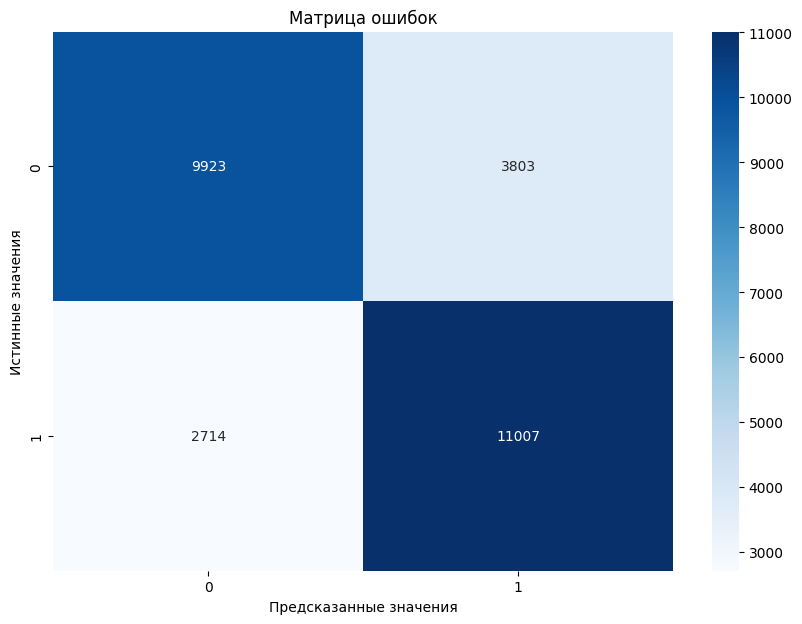

In [55]:


# Вычисление матрицы ошибок
conf_mat = confusion_matrix(y_test, y_pred)

# Создание тепловой карты для матрицы ошибок
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()


In [59]:
# Получение коэффициентов модели
coefficients = logreg.coef_[0]

# Сопоставление коэффициентов с именами столбцов
feature_importance = pd.Series(coefficients, index=X_train.columns)

# Сортировка коэффициентов по абсолютному значению
sorted_features = feature_importance.abs().sort_values(ascending=False)

# Вывод отсортированных коэффициентов
print(sorted_features)


orders_936     0.736008
orders_1372    0.572824
orders_1395    0.567437
orders_738     0.507147
orders_1610    0.498224
                 ...   
visits_860     0.000000
visits_1320    0.000000
orders_512     0.000000
visits_1322    0.000000
orders_757     0.000000
Length: 2034, dtype: float64


In [63]:
sorted_features.to_csv('sorted_features.csv')

In [56]:
from sklearn.svm import SVC

# Создание и обучение модели SVM
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred_svm = svm_model.predict(X_test_scaled)

# Расчет метрик и вывод результатов
print("Классификационный отчет:\n", classification_report(y_test, y_pred_svm))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred_svm))


Классификационный отчет:
               precision    recall  f1-score   support

           0       0.80      0.69      0.74     13726
           1       0.72      0.82      0.77     13721

    accuracy                           0.75     27447
   macro avg       0.76      0.75      0.75     27447
weighted avg       0.76      0.75      0.75     27447

Матрица ошибок:
 [[ 9410  4316]
 [ 2421 11300]]


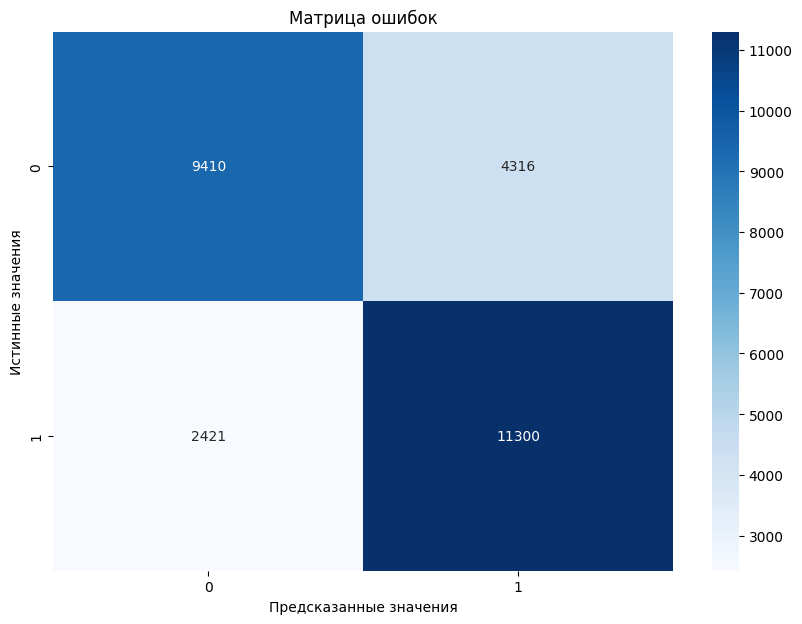

In [58]:
# Вычисление матрицы ошибок
conf_mat = confusion_matrix(y_test, y_pred_svm)

# Создание тепловой карты для матрицы ошибок
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Создание и обучение модели Случайного леса
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred_rf = random_forest.predict(X_test_scaled)

# Расчет метрик и вывод результатов
print("Классификационный отчет:\n", classification_report(y_test, y_pred_rf))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred_rf))


Классификационный отчет:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75     13726
           1       0.75      0.76      0.76     13721

    accuracy                           0.75     27447
   macro avg       0.76      0.75      0.75     27447
weighted avg       0.76      0.75      0.75     27447

Матрица ошибок:
 [[10234  3492]
 [ 3233 10488]]


In [62]:
from sklearn.ensemble import GradientBoostingClassifier

# Создание и обучение модели градиентного бустинга
gradient_boosting = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=42)
gradient_boosting.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred_gb = gradient_boosting.predict(X_test_scaled)

# Расчет метрик и вывод результатов
print("Классификационный отчет:\n", classification_report(y_test, y_pred_gb))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred_gb))


Классификационный отчет:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76     13726
           1       0.75      0.81      0.78     13721

    accuracy                           0.77     27447
   macro avg       0.77      0.77      0.77     27447
weighted avg       0.77      0.77      0.77     27447

Матрица ошибок:
 [[ 9976  3750]
 [ 2581 11140]]


In [64]:
from sklearn.ensemble import GradientBoostingClassifier

# Создание и обучение модели градиентного бустинга
gradient_boosting = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
gradient_boosting.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred_gb = gradient_boosting.predict(X_test_scaled)

# Расчет метрик и вывод результатов
print("Классификационный отчет:\n", classification_report(y_test, y_pred_gb))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred_gb))

Классификационный отчет:
               precision    recall  f1-score   support

           0       0.80      0.73      0.77     13726
           1       0.75      0.82      0.78     13721

    accuracy                           0.78     27447
   macro avg       0.78      0.78      0.77     27447
weighted avg       0.78      0.78      0.77     27447

Матрица ошибок:
 [[10070  3656]
 [ 2514 11207]]


In [65]:
from sklearn.ensemble import GradientBoostingClassifier

# Создание и обучение модели градиентного бустинга
gradient_boosting = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, random_state=42)
gradient_boosting.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred_gb = gradient_boosting.predict(X_test_scaled)

# Расчет метрик и вывод результатов
print("Классификационный отчет:\n", classification_report(y_test, y_pred_gb))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred_gb))

Классификационный отчет:
               precision    recall  f1-score   support

           0       0.80      0.73      0.77     13726
           1       0.75      0.82      0.78     13721

    accuracy                           0.78     27447
   macro avg       0.78      0.78      0.78     27447
weighted avg       0.78      0.78      0.78     27447

Матрица ошибок:
 [[10054  3672]
 [ 2485 11236]]


In [66]:
from sklearn.ensemble import GradientBoostingClassifier

# Создание и обучение модели градиентного бустинга
gradient_boosting = GradientBoostingClassifier(n_estimators=500, learning_rate=0.3, random_state=42)
gradient_boosting.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred_gb = gradient_boosting.predict(X_test_scaled)

# Расчет метрик и вывод результатов
print("Классификационный отчет:\n", classification_report(y_test, y_pred_gb))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred_gb))

Классификационный отчет:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76     13726
           1       0.75      0.83      0.79     13721

    accuracy                           0.78     27447
   macro avg       0.78      0.78      0.77     27447
weighted avg       0.78      0.78      0.77     27447

Матрица ошибок:
 [[ 9951  3775]
 [ 2396 11325]]


In [67]:
from sklearn.ensemble import GradientBoostingClassifier

# Создание и обучение модели градиентного бустинга
gradient_boosting = GradientBoostingClassifier(n_estimators=1500, learning_rate=0.1, random_state=42)
gradient_boosting.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred_gb = gradient_boosting.predict(X_test_scaled)

# Расчет метрик и вывод результатов
print("Классификационный отчет:\n", classification_report(y_test, y_pred_gb))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred_gb))

Классификационный отчет:
               precision    recall  f1-score   support

           0       0.80      0.73      0.77     13726
           1       0.76      0.82      0.79     13721

    accuracy                           0.78     27447
   macro avg       0.78      0.78      0.78     27447
weighted avg       0.78      0.78      0.78     27447

Матрица ошибок:
 [[10076  3650]
 [ 2441 11280]]


In [68]:
from sklearn.ensemble import GradientBoostingClassifier

# Создание и обучение модели градиентного бустинга
gradient_boosting = GradientBoostingClassifier(n_estimators=500, learning_rate=0.3, random_state=42)
gradient_boosting.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred_gb = gradient_boosting.predict(X_test_scaled)

# Расчет метрик и вывод результатов
print("Классификационный отчет:\n", classification_report(y_test, y_pred_gb))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred_gb))

Классификационный отчет:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76     13726
           1       0.75      0.83      0.79     13721

    accuracy                           0.78     27447
   macro avg       0.78      0.78      0.77     27447
weighted avg       0.78      0.78      0.77     27447

Матрица ошибок:
 [[ 9951  3775]
 [ 2396 11325]]


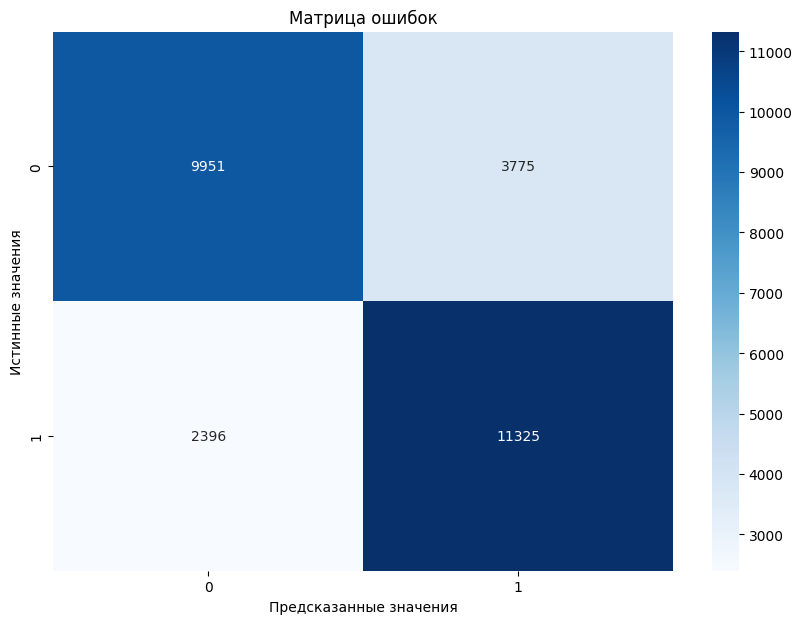

In [69]:
# Вычисление матрицы ошибок
conf_mat = confusion_matrix(y_test, y_pred_gb)

# Создание тепловой карты для матрицы ошибок
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()

In [70]:
df_transposed_1.columns

Index(['target', 'orders_1', 'visits_1', 'orders_2', 'visits_2', 'orders_3',
       'visits_3', 'orders_5', 'visits_5', 'orders_6',
       ...
       'category_cosmetics',
       'category_"0" => "f", "1" => "a", "2" => "s", "3" => "h", "4" => "i", "5" => "o", "6" => "n"',
       'category_pets', 'category_luxury', 'category_education',
       'category_health', 'category_fashion', 'category_sport',
       'category_household_appliances', 'category_entertainment_services'],
      dtype='object', length=2035)

In [71]:
columnsss = df_transposed_1.columns

In [73]:
filtered_columns = [col for col in columnsss if not col.startswith('category')]

In [75]:
df_filtered = df_transposed_1[filtered_columns]

In [76]:
# Определение целевой переменной (y) и признаков (X)
y_train2 = df_filtered['target']
X_train2 = df_filtered.drop('target', axis=1)

In [85]:
columnsss = X_test.columns

In [86]:
filtered_columns = [col for col in columnsss if not col.startswith('category')]

In [87]:
X_test2 = X_test[filtered_columns]

In [88]:
y_test2 = y_test

In [89]:
# Вывод размеров полученных выборок
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((127755, 2010), (27447, 2010), (127755,), (27447,))

In [90]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

# Создание и обучение модели логистической регрессии с увеличенным max_iter и другим solver
logreg = LogisticRegression(max_iter=1000, solver='newton-cg')
logreg.fit(X_train_scaled, y_train2)

# Предсказание и оценка модели на масштабированных данных
y_pred = logreg.predict(X_test_scaled)

In [91]:
# Расчет метрик и вывод результатов
print("Классификационный отчет:\n", classification_report(y_test2, y_pred))
print("Матрица ошибок:\n", confusion_matrix(y_test2, y_pred))

Классификационный отчет:
               precision    recall  f1-score   support

           0       0.80      0.68      0.73     13726
           1       0.72      0.83      0.77     13721

    accuracy                           0.75     27447
   macro avg       0.76      0.75      0.75     27447
weighted avg       0.76      0.75      0.75     27447

Матрица ошибок:
 [[ 9275  4451]
 [ 2373 11348]]


In [93]:
# Получение коэффициентов модели
coefficients = logreg.coef_[0]

# Сопоставление коэффициентов с именами столбцов
feature_importance = pd.Series(coefficients, index=X_train2.columns)

# Сортировка коэффициентов по абсолютному значению
sorted_features = feature_importance.abs().sort_values(ascending=False)

# Вывод отсортированных коэффициентов
print(sorted_features)

orders_936     0.804822
orders_1395    0.631382
orders_1372    0.625559
orders_738     0.565206
orders_1610    0.553290
                 ...   
visits_1163    0.000000
visits_1164    0.000000
orders_277     0.000000
orders_274     0.000000
visits_1816    0.000000
Length: 2010, dtype: float64


In [94]:
sorted_features.to_csv('coef2.csv', index=False)

In [95]:
# Создание и обучение модели градиентного бустинга
gradient_boosting = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.3, random_state=42)
gradient_boosting.fit(X_train_scaled, y_train2)

# Предсказание на тестовой выборке
y_pred_gb = gradient_boosting.predict(X_test_scaled)

# Расчет метрик и вывод результатов
print("Классификационный отчет:\n", classification_report(y_test2, y_pred_gb))
print("Матрица ошибок:\n", confusion_matrix(y_test2, y_pred_gb))

Классификационный отчет:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76     13726
           1       0.74      0.83      0.78     13721

    accuracy                           0.77     27447
   macro avg       0.77      0.77      0.77     27447
weighted avg       0.77      0.77      0.77     27447

Матрица ошибок:
 [[ 9792  3934]
 [ 2359 11362]]
